In [432]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [433]:
df = pd.read_csv('./CRPSets/CRPSets.csv', header=None)

In [434]:
df.shape

(12000, 65)

In [435]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,1,1,1,0,1,0,0,1,...,1,1,0,0,0,1,0,1,1,1
1,1,0,1,0,1,0,0,0,1,0,...,1,1,1,0,0,0,0,0,1,0
2,1,1,0,1,0,1,1,0,1,0,...,1,0,1,1,1,0,0,1,0,0
3,0,1,0,0,0,0,1,1,0,1,...,1,1,1,1,1,0,0,1,1,0
4,1,1,0,0,0,1,1,1,0,1,...,0,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,1,0,1,1,1,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0
11996,0,1,0,0,1,1,0,1,0,1,...,1,1,1,0,0,1,0,1,0,1
11997,1,1,1,0,0,0,1,1,0,0,...,1,1,0,1,0,1,1,0,0,0
11998,0,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,1


In [436]:
# Dataset (1 categorical + 7 numerical)
dataset = df.drop([64], axis=1)

# Target value
target = df[64]

In [437]:
dataset = np.array(dataset)

In [438]:
target = np.array(target)

In [439]:
data_train, data_val, target_train, target_val = train_test_split(dataset, 
                                                                    target,
                                                                    test_size=0.2,
                                                                    shuffle=True,
                                                                    random_state=0)
data_train

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0]])

In [440]:
log_reg = LogisticRegressionCV(cv=100)
# penalty is the "regularizer term"

In [441]:
log_reg.fit(data_train, target_train)

LogisticRegressionCV(cv=100)

In [442]:
p_val = log_reg.predict(data_val)
p_val

array([1, 0, 0, ..., 0, 1, 0])

In [443]:
log_reg.score(data_train, target_train)

0.5702083333333333

In [444]:
# Model 2 - Logistic Regression
lr = Pipeline([('scaler', MinMaxScaler()),
              ('LR', SGDClassifier())])

In [445]:
# Setting up experiments: dictionary with the values for all hyperparameters
param_grid = {'LR__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'LR__alpha': [0, 0.0001, 0.001, 0.01, 0.1, 0.5]}

# Object to will carry experiments: must include performance measure and CV strategy (by default it uses k-fold CV)
grid_search = GridSearchCV(lr,
                           param_grid=param_grid,
                           cv=KFold(100,shuffle=True,random_state=0),
                           scoring='accuracy',
                           refit = True)

# Find the best parameters using the training data
grid_search.fit(data_train, target_train)

# Best Hyperparameter values 
print('Best hyperparameter values:', grid_search.best_params_)

# Best model
lr_best = grid_search.best_estimator_

Best hyperparameter values: {'LR__alpha': 0.001, 'LR__learning_rate': 'optimal'}


/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1900 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_

TRAINING SET
              precision    recall  f1-score   support

           0       0.60      0.54      0.57      5193
           1       0.51      0.56      0.54      4407

    accuracy                           0.55      9600
   macro avg       0.55      0.55      0.55      9600
weighted avg       0.56      0.55      0.55      9600



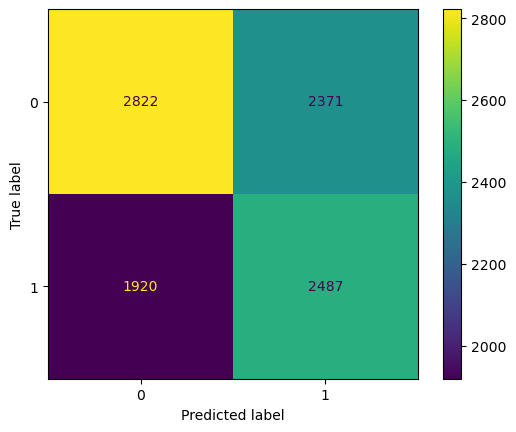



TEST SET
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1301
           1       0.51      0.53      0.52      1099

    accuracy                           0.56      2400
   macro avg       0.55      0.55      0.55      2400
weighted avg       0.56      0.56      0.56      2400



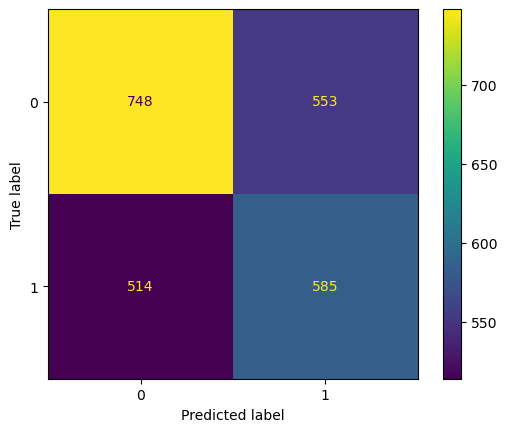

In [446]:
# Making predictions train/test
y_train = lr_best.predict(data_train)
y_val  = lr_best.predict(data_val)

# Displaying results
print('TRAINING SET')
print(classification_report(target_train, y_train))
disp_train=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_train, y_train))
disp_train.plot(); plt.show()
print('\n\nTEST SET')
print(classification_report(target_val, y_val))
disp_test=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_val, y_val))
disp_test.plot();